In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import average
import json

In [38]:
sns.set(font_scale=2)
sns.set_palette(sns.color_palette("Paired"))

def printplot_all(java8, graal, truffle, truffle_dispatch, keys, print_name=None):
    plt.rcParams['figure.constrained_layout.use'] = False
    fig = plt.figure(figsize=(20,4))
    for (i, algo) in enumerate(keys):
        ax = fig.add_subplot(1, 4, i + 1)
        dico_perfs = {
            'java8': java8[algo][10:],
            'graal': graal[algo][10:],
            'truffle': truffle[algo][10:],
        }
        if truffle_dispatch is not None:
            dico_perfs['dispatch'] = truffle_dispatch[algo][10:]
        from_dict = pd.DataFrame.from_dict(dico_perfs)

        a=average(java8[algo][10:])
        b=average(graal[algo][10:])
        c=average(truffle[algo][10:])
        
        d=average(truffle_dispatch[algo][10:]) if truffle_dispatch is not None else 0

        print(algo)
        print('oracle vs graal: x' + str(round(1.0/(b/a),2)))
        print('graal vs oracle: x' + str(round(1.0/(a/b),2)))
        print('graal vs truffle: x' + str(round(1.0/(c/b),2)))
        print('graal vs truffle+dispatch: x' + str(round(1.0/(d/b),2)))
        if truffle_dispatch is not None:
            print('truffle vs truffle+dispatch: x' + str(round(1.0/(d/c),2)))

        sns.barplot(data=from_dict, ax=ax)
        if algo == 'fib':
            ax.set_title('fibonacci')
        else:
            ax.set_title(algo)
    fig.autofmt_xdate()
    fig.tight_layout()
    
    if print_name:
        plt.savefig(f'{print_name}.pdf')

def printplot_oracle_graal(java8, graal, keys, print_name=None):
    plt.rcParams['figure.constrained_layout.use'] = False
    fig = plt.figure(figsize=(20,5))
    for (i, algo) in enumerate(keys):
        ax = fig.add_subplot(1, 4, i + 1)
        dico_perfs = {
            'java8': java8[algo][10:],
            'graal': graal[algo][10:],

        }
        from_dict = pd.DataFrame.from_dict(dico_perfs)

        a=average(java8[algo][10:])
        b=average(graal[algo][10:])

        print(algo)
        print('x' + str(round(1.0/(b/a),2)))

        sns.barplot(data=from_dict, ax=ax)
        #plt.xticks(rotation=90)
        if algo == 'fib':
            ax.set_title('fibonacci')
        else:
            ax.set_title(algo)
    fig.autofmt_xdate()
    fig.tight_layout()
    
    if print_name:
        plt.savefig(f'{print_name}.pdf')
    

In [39]:
minijava_java8 = {
    'sort':
        [12612, 12583, 11750, 11725, 11649, 11658, 11610, 11621, 11456, 11659, 11601, 11697, 11596, 11710, 11824,
         11655, 11647, 11758, 11668, 11836, 11634, 11691, 11761, 11717, 11785, 11648, 11629, 11780, 11690, 11738,
         11596, 11668, 11748, 11680, 11609, 11592, 11665, 11793, 11685, 11673, 11702, 11662, 11839, 11622, 11669,
         11682, 11642, 11788, 11594, 11665],
    'binarytree': [9917, 9150, 9029, 8750, 8999, 8781, 9269, 8773, 8814, 9281, 8778, 8802, 8756, 9264, 8665, 8669,
                   8690, 8662, 8649, 8764, 8847, 8864, 8898, 8878, 8712, 8877, 8748, 8793, 8790, 9320, 8767, 8788,
                   8804, 8813, 8825, 8860, 8802, 8824, 8849, 8814, 8798, 8838, 8826, 8822, 8802, 8805, 8821, 8846,
                   8826, 8813],
    'fannkuchredux':
        [9040, 8902, 8392, 8431, 8506, 8381, 8399, 8418, 8420, 8523, 8655, 8611, 8645, 8628, 8571, 8495,
         8551, 8545, 8628, 8555, 8558, 8690, 8614, 8595, 8638, 8610, 8589, 8598, 8552, 8568, 8580, 8599,
         8662, 8630, 8570, 8630, 8472, 8646, 8612, 8513, 8605, 8638, 8520, 8580, 8597, 8590, 8710, 8704,
         8664, 8683],
    'fib': [14183, 13547, 13435, 13425, 13414, 13413, 13519, 13711, 13671, 13651, 13639, 13624, 13662, 13674, 13640,
            13640, 13652, 13683, 13652, 13679, 13620, 13676, 13612, 13661, 13655, 13675, 13601, 13665, 13658, 13632,
            13625, 13680, 13648, 13666, 13644, 13674, 13678, 13620, 13625, 13615, 13611, 13633, 13611, 13693, 13614,
            13686, 13610, 13630, 13641, 13692]}

minijava_graal = {
    'sort': [11897, 9736, 9686, 9734, 9700, 9721, 9810, 9633, 9587, 9589, 9569, 9575, 9538, 9602, 9611, 9565, 9597,
             9592, 9598, 9660, 9596, 9639, 9577, 9609, 9605, 9579, 9606, 9603, 9592, 9599, 9579, 9578, 9599, 9601,
             9643, 9598, 9650, 9600, 9583, 9624, 9587, 9620, 9643, 9602, 9616, 9586, 9620, 9662, 9631, 9622],
    'binarytree': [10217, 7501, 7338, 7468, 7250, 7253, 7256, 7263, 7255, 7257, 7160, 7225, 7157, 7137, 7125,
                   7157, 7154, 7172, 7164, 7111, 7124, 7153, 7160, 7147, 7128, 7132, 7199, 7111, 7118, 7173,
                   7170, 7131, 7137, 7162, 7213, 7131, 7142, 7176, 7100, 7146, 7140, 7157, 7108, 7156, 7171,
                   7138, 7142, 7147, 7174, 7135],
    'fannkuchredux': [8716, 6468, 6290, 6265, 6258, 6235, 6270, 6271, 6261, 6306, 6280, 6284, 6295, 6303, 6377,
                      6334, 6326, 6341, 6370, 6357, 6334, 6336, 6347, 6357, 6383, 6368, 6346, 6354, 6384, 6361,
                      6376, 6349, 6383, 6360, 6358, 6400, 6365, 6378, 6397, 6363, 6373, 6396, 6386, 6355, 6370,
                      6353, 6354, 6368, 6368, 6377],
    'fib': [13867, 11833, 11772, 11792, 11800, 11788, 11827, 11819, 11850, 11839, 11882, 11926, 11907, 11940,
            11961, 11962, 11962, 11938, 11974, 11983, 11995, 11984, 11976, 11954, 11987, 11977, 12033, 12036,
            11987, 11986, 12009, 12003, 11996, 11967, 11982, 11980, 11966, 12010, 11987, 11989, 11994, 12061,
            12017, 12013, 11967, 12014, 11976, 12052, 12031, 12007]}

logo_java8 = {
    'fractal': [20146, 18836, 19033, 20243, 18654, 19450, 18467, 18601, 20039, 18472, 20217, 18397, 18425, 19032, 18336, 20128, 18299, 18347, 20054, 18359, 18456, 18694, 18702, 18385, 18571, 19017, 18374, 18454, 18324, 18574, 18412, 18305, 19885, 18497, 18473, 18461, 19973, 18415, 18362, 18331, 18546, 18700, 18580, 18503, 18323, 19576, 18408, 18391, 18669, 18389]
}

logo_graal = {
    'fractal': [11743, 9491, 8985, 9853, 8899, 8962, 9389, 8833, 8706, 8750, 8763, 8834, 8620, 8681, 8745, 8652, 8514, 8686, 8708, 8631, 8573, 8592, 8609, 8653, 8643, 8541, 8702, 8645, 8582, 8664, 8723, 8592, 8624, 8603, 8698, 8741, 8751, 8657, 8554, 8669, 8682, 8614, 8531, 8609, 8642, 8582, 8525, 8628, 8684, 8583]
}


fsm_java8 = {
    'machine': [7347, 7542, 7499, 7476, 7502, 7581, 7521, 7512, 7467, 7511, 7543, 7657, 7509, 7501, 7587, 7521, 7554, 7547, 7546, 7619, 7518, 7575, 7570, 7503, 7545, 7615, 7600, 7528, 7753, 7659, 7585, 7582, 7667, 7796, 7587, 7544, 7515, 7618, 7528, 7629, 7546, 7636, 7575, 7503, 7527, 7514, 7498, 7547, 7562, 7824]
}

fsm_graal = {
    'machine': [7661, 5732, 5270, 5242, 5312, 5253, 5334, 5280, 5325, 5334, 5366, 5336, 5338, 5355, 5399, 5344, 5365, 5368, 5384, 5433, 5315, 5341, 5338, 5406, 5380, 5346, 5369, 5379, 5332, 5369, 5349, 5354, 5388, 5337, 5393, 5438, 5387, 5348, 5373, 5359, 5441, 5393, 5482, 5347, 5392, 5389, 5386, 5426, 5372, 5369]
}

boa_java8 = {
    'fibonacci': [2535, 2576, 2451, 2425, 2608, 2559, 2520, 2532, 2523, 2517, 2520, 2526, 2527, 2526, 2520, 2513, 2507, 2512, 2545, 2527, 2528, 2523, 2524, 2525, 2484, 2505, 2519, 2535, 2528, 2520, 2503, 2535, 2523, 2510, 2518, 2511, 2530, 2521, 2541, 2501, 2490, 2509, 2517, 2509, 2544, 2502, 2504, 2514, 2514, 2517],
    'sort': [2692, 2521, 2420, 2379, 2483, 2454, 2432, 2444, 2493, 2448, 2455, 2454, 2455, 2454, 2466, 2443, 2473, 2484, 2449, 2460, 2459, 2447, 2455, 2459, 2441, 2448, 2467, 2439, 2455, 2457, 2468, 2451, 2453, 2448, 2452, 2463, 2443, 2450, 2450, 2452, 2448, 2448, 2440, 2458, 2470, 2444, 2448, 2450, 2449, 2438]
}

boa_graal = {
    'fibonacci': [3952, 1729, 1363, 1393, 1326, 1340, 1362, 1311, 1297, 1301, 1281, 1314, 1311, 1290, 1292, 1308, 1288, 1296, 1273, 1285, 1278, 1299, 1305, 1302, 1284, 1296, 1293, 1296, 1304, 1293, 1293, 1313, 1306, 1299, 1317, 1308, 1297, 1296, 1300, 1297, 1297, 1292, 1296, 1300, 1286, 1298, 1302, 1309, 1312, 1302],
    'sort': [4866, 1808, 1647, 1475, 1413, 1391, 1410, 1400, 1397, 1383, 1393, 1391, 1394, 1390, 1396, 1438, 1416, 1415, 1406, 1385, 1397, 1421, 1394, 1431, 1387, 1390, 1404, 1394, 1395, 1382, 1389, 1387, 1390, 1393, 1393, 1387, 1397, 1390, 1383, 1394, 1385, 1383, 1392, 1388, 1410, 1402, 1388, 1386, 1395, 1389]
}

# Minijava: Oracle vs Graal

fib
x1.14
sort
x1.22
binarytree
x1.23
fannkuchredux
x1.35


/home/manuel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


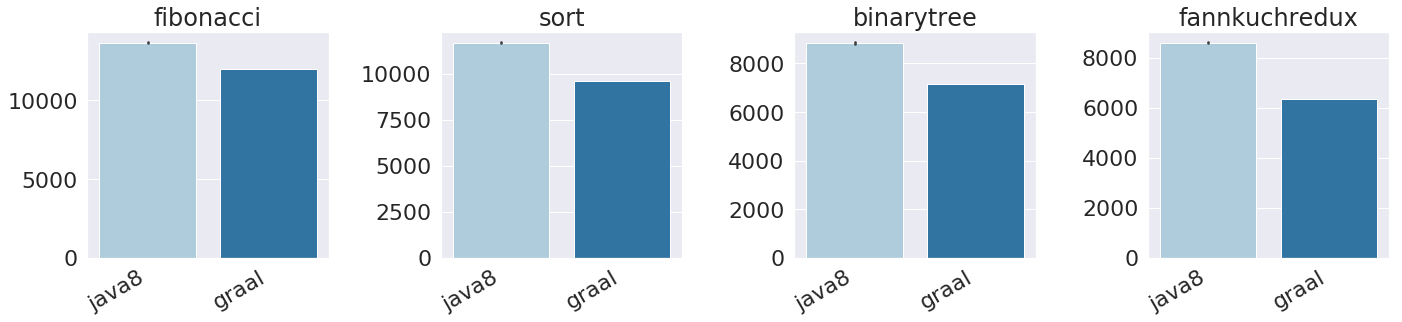

In [40]:
printplot_oracle_graal(minijava_java8, minijava_graal, ['fib', 'sort', 'binarytree', 'fannkuchredux'], print_name='oracle_vs_graal')

# Logo: Oracle vs Graal

fractal
x2.16


/home/manuel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


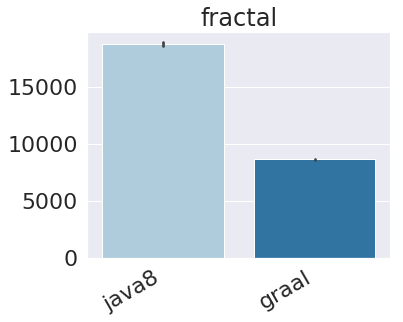

In [ ]:
printplot_oracle_graal(logo_java8, logo_graal, ['fractal'])

# Logo: Oracle vs Graal vs Truffle

fractal
oracle vs graal: x2.16
graal vs oracle: x0.46
graal vs truffle: x1.19
graal vs truffle+dispatch: x1.23
truffle vs truffle+dispatch: x1.04


/home/manuel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


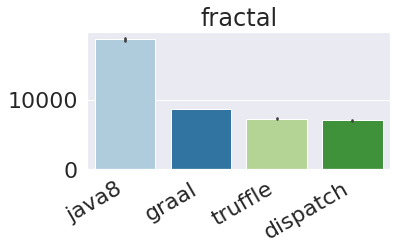

In [ ]:
printplot_all(logo_java8, logo_graal, 
              { 'fractal': [10031, 7750, 8216, 7352, 8042, 7324, 8574, 7416, 8609, 7355, 8962, 7105, 7197, 7084, 7096, 7238, 7110, 7125, 7211, 7238, 7319, 7353, 7250, 7324, 7233, 7162, 7299, 7170, 7188, 7171, 7225, 7266, 7190, 7316, 7332, 7336, 7304, 7215, 7176, 7182, 7233, 7244, 7257, 7307, 7272, 7227, 7257, 7222, 7335, 7194]}, 
              { 'fractal': [10556, 7861, 9271, 6935, 6940, 7157, 6984, 7132, 7021, 7025, 7131, 7044, 7061, 7166, 6936, 6891, 6966, 7158, 6894, 6974, 7082, 7146, 7072, 6883, 6961, 7112, 6926, 6936, 7015, 7101, 6936, 7020, 7021, 7125, 6924, 6962, 7031, 7124, 6939, 6906, 6976, 7036, 6950, 6964, 7049, 7094, 6996, 6906, 7034, 7150]}, 
              ['fractal'], print_name='logo_all')

# FSM: Oracle vs Graal

In [ ]:
printplot_oracle_graal(fsm_java8, fsm_graal, ['machine'])

machine
x1.41


/home/manuel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


# FSM: Oracle vs Graal vs Truffle

In [ ]:
printplot_all(fsm_java8, fsm_graal, 
              { 'machine': [7116, 5577, 5071, 5102, 5039, 5060, 5031, 5098, 5027, 5047, 5044, 5058, 5080, 5074, 5049, 5064, 5091, 5112, 5093, 5082, 5090, 5079, 5080, 5092, 5094, 5087, 5113, 5090, 5101, 5087, 5080, 5111, 5087, 5092, 5096, 5086, 5094, 5109, 5104, 5093, 5103, 5096, 5102, 5098, 5110, 5088, 5123, 5102, 5105, 5090]}, 
              { 'machine': [7561, 5488, 5747, 5557, 5404, 5410, 5410, 5445, 5434, 5441, 5475, 5467, 5454, 5456, 5469, 5456, 5458, 5479, 5490, 5486, 5481, 5481, 5484, 5472, 5484, 5472, 5473, 5501, 5486, 5477, 5480, 5480, 5489, 5472, 5491, 5485, 5487, 5453, 5464, 5458, 5469, 5475, 5466, 5462, 5474, 5462, 5467, 5490, 5466, 5483]}, 
              ['machine'], print_name='fsm_all')

# Boa : Oracle vs Graal

fibonacci
oracle vs graal: x1.94
graal vs oracle: x0.52
graal vs truffle: x1.21
graal vs truffle+dispatch: x1.23
truffle vs truffle+dispatch: x1.02
sort
oracle vs graal: x1.76
graal vs oracle: x0.57
graal vs truffle: x1.05
graal vs truffle+dispatch: x1.09
truffle vs truffle+dispatch: x1.03


/home/manuel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


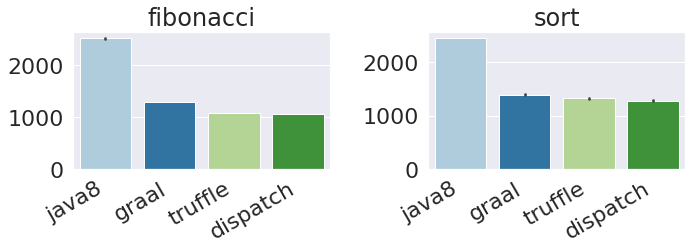

In [56]:
printplot_all(boa_java8, boa_graal, # [3242, 1550, 1357, 1265, 1264, 1254, 1274, 1254, 1247, 1256, 1256, 1255, 1257, 1244, 1242, 1252, 1258, 1247, 1255, 1247, 1251, 1254, 1267, 1243, 1253, 1251, 1249, 1238, 1238, 1257, 1248, 1252, 1254, 1242, 1248, 1251, 1251, 1240, 1257, 1257, 1240, 1247, 1248, 1246, 1257, 1240, 1259, 1255, 1258, 1256]
              { 'fibonacci': [3056, 1491, 1190, 1172, 1111, 1100, 1093, 1103, 1085, 1088, 1077, 1077, 1084, 1075, 1076, 1076, 1083, 1082, 1089, 1075, 1074, 1075, 1067, 1067, 1073, 1073, 1086, 1069, 1073, 1068, 1072, 1075, 1072, 1072, 1073, 1067, 1071, 1069, 1069, 1101, 1085, 1083, 1073, 1069, 1077, 1084, 1084, 1069, 1082, 1076],
                'sort': [3766, 1885, 1553, 1456, 1401, 1369, 1368, 1357, 1339, 1350, 1322, 1326, 1391, 1315, 1316, 1394, 1329, 1348, 1341, 1321, 1339, 1341, 1322, 1319, 1353, 1324, 1349, 1313, 1329, 1321, 1322, 1319, 1310, 1325, 1321, 1315, 1319, 1345, 1327, 1316, 1340, 1321, 1312, 1308, 1320, 1322, 1308, 1312, 1322, 1313]
              }, 
              { 'fibonacci': [3001, 1410, 1143, 1144, 1067, 1069, 1084, 1098, 1062, 1064, 1066, 1058, 1059, 1057, 1068, 1072, 1056, 1062, 1060, 1064, 1055, 1058, 1063, 1057, 1051, 1056, 1067, 1056, 1057, 1050, 1059, 1070, 1067, 1057, 1051, 1054, 1056, 1056, 1048, 1055, 1054, 1051, 1049, 1045, 1053, 1055, 1067, 1061, 1067, 1053],
                'sort': [3948, 1680, 1579, 1356, 1327, 1323, 1303, 1303, 1294, 1273, 1276, 1289, 1277, 1286, 1278, 1328, 1327, 1292, 1301, 1299, 1277, 1339, 1276, 1280, 1282, 1278, 1313, 1288, 1273, 1273, 1285, 1270, 1274, 1271, 1270, 1272, 1275, 1275, 1271, 1285, 1271, 1285, 1308, 1277, 1282, 1271, 1283, 1279, 1278, 1284]
              }, 
              ['fibonacci', 'sort'], print_name='boa_all')